<a href="https://colab.research.google.com/github/nishant16294-art/applied-statistic-project/blob/main/applied_statistic_project_nishant_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# load dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/almabetter_project/Superstore Marketing Data.xlsx')
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 1 - Basic CleanUp**

1.Clean and preprocess the dataset (handling missing values, data types, etc.).

2.Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

In [ ]:
# Clean and preprocess the dataset (handling missing values, data types, etc.)

print(df.head())
print('\n\n')

print(df.info())
print('\n\n')

print ('check how many rows are null')
print(df.isnull().sum())

print('\n\n')
print('check how many rows are duplicate')
print(df.duplicated().sum())


      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3    ########        0        10  ...                0                 0   
4    ########        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurch

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
print(df['Income'].isnull().sum())

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
most_common_date = df['Dt_Customer'].mode()[0]
df['Dt_Customer'].fillna(most_common_date)
print(df['Dt_Customer'].isnull().sum())

0
916


In [ ]:
# Print data types
print(df.dtypes)


Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object


In [ ]:
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

print(df[['Education', 'Marital_Status']].dtypes)
print(df[['Education', 'Marital_Status']].head())


Education         category
Marital_Status    category
dtype: object
    Education Marital_Status
0  Graduation       Divorced
1  Graduation         Single
2  Graduation        Married
3  Graduation       Together
4  Graduation         Single


In [ ]:
# Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

# Descriptive statistics for numerical demographic columns
df['Age'] = 2025 - df['Year_Birth']
demographic_numerical = ['Age', 'Income', 'Kidhome', 'Teenhome']
print("📊 Numerical Demographics Summary:")
print(df[demographic_numerical].describe())


# Value counts for categorical demographic columns
demographic_categorical = ['Education', 'Marital_Status', 'Response']
for col in demographic_categorical:
    print(f"\n🔸 Value counts for {col}:")
    print(df[col].value_counts(normalize=True) * 100)  # percentage distribution


📊 Numerical Demographics Summary:
               Age         Income      Kidhome     Teenhome
count  2240.000000    2240.000000  2240.000000  2240.000000
mean     56.194196   52247.251354     0.444196     0.506250
std      11.984069   25037.797168     0.538398     0.544538
min      29.000000    1730.000000     0.000000     0.000000
25%      48.000000   35538.750000     0.000000     0.000000
50%      55.000000   51741.500000     0.000000     0.000000
75%      66.000000   68289.750000     1.000000     1.000000
max     132.000000  666666.000000     2.000000     2.000000

🔸 Value counts for Education:
Education
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: proportion, dtype: float64

🔸 Value counts for Marital_Status:
Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name:

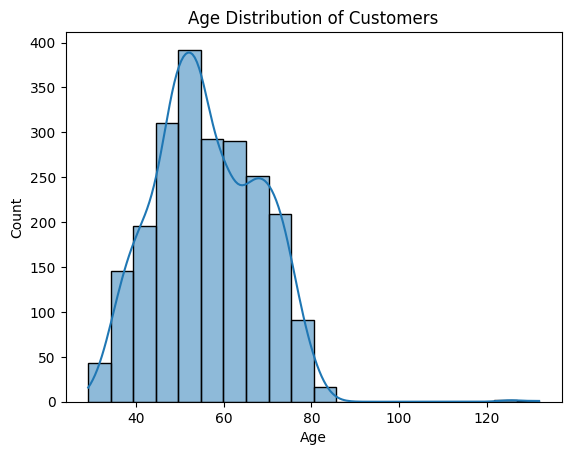

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Task 2** - Descriptive Statistics

In [ ]:
# Selecting relevant numerical columns
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
        'NumWebVisitsMonth']

# Descriptive statistics table
desc_stats = df[cols].agg(['mean', 'median','std', 'var', 'min', 'max', 'skew']).T
desc_stats.columns = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Skewness']
print(desc_stats)


print('\n\n')
# Mode calculation separately
for col in cols:
    print(f"Mode of {col}: {df[col].mode().values}")

                           Mean  Median     Std Dev       Variance  Min  \
MntWines             303.935714   173.5  336.597393  113297.804709  0.0   
MntFruits             26.302232     8.0   39.773434    1581.926033  0.0   
MntMeatProducts      166.950000    67.0  225.715373   50947.429388  0.0   
MntFishProducts       37.525446    12.0   54.628979    2984.325391  0.0   
MntSweetProducts      27.062946     8.0   41.280498    1704.079555  0.0   
MntGoldProds          44.021875    24.0   52.167439    2721.441683  0.0   
NumDealsPurchases      2.325000     2.0    1.932238       3.733542  0.0   
NumWebPurchases        4.084821     4.0    2.778714       7.721252  0.0   
NumCatalogPurchases    2.662054     2.0    2.923101       8.544517  0.0   
NumStorePurchases      5.790179     5.0    3.250958      10.568729  0.0   
NumWebVisitsMonth      5.316518     6.0    2.426645       5.888606  0.0   

                        Max  Skewness  
MntWines             1493.0  1.175771  
MntFruits          

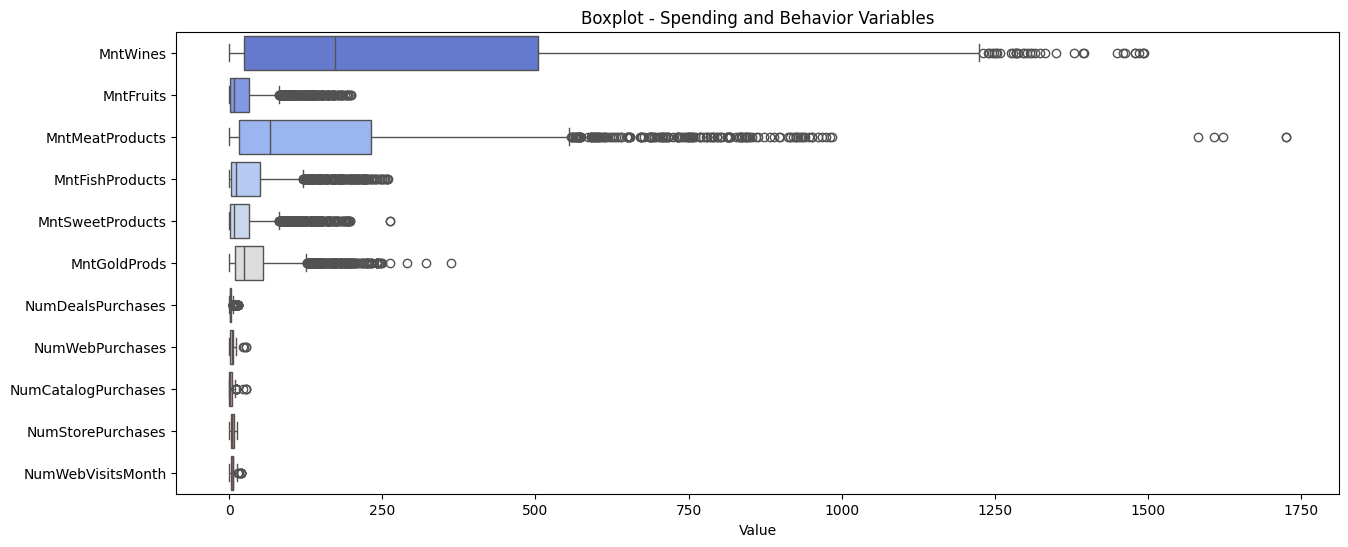

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=df[cols], orient='h', palette="coolwarm")
plt.title("Boxplot - Spending and Behavior Variables")
plt.xlabel("Value")
plt.show()


Task 3 - Probability Distributions




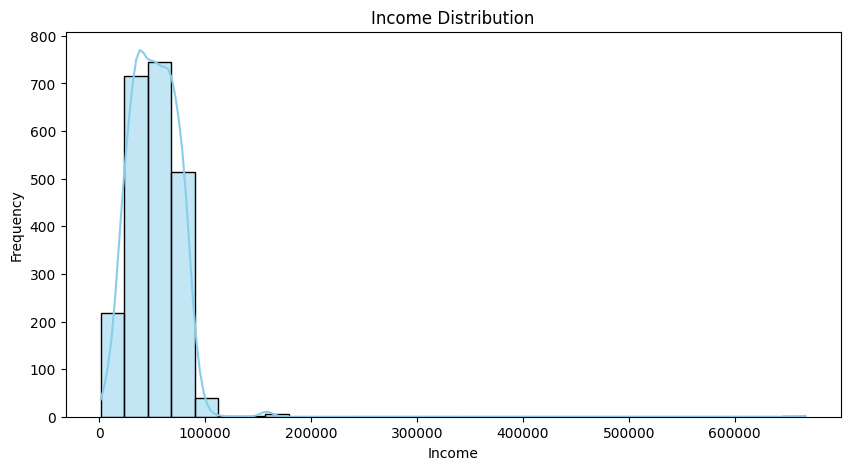

In [ ]:
# Step 1: Choose Suitable Variables

#1.Continuous (Normal)	Income, MntWines, MntMeatProducts, MntGoldProds, Recency
#2.Discrete (Binomial/Poisson)	NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases

# Step 2: Check for Normal Distribution (Histogram + KDE)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histogram + KDE for continuous variable
plt.figure(figsize=(10,5))
sns.histplot(df['Income'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


In [ ]:
 # Step 3: Normality Test (Shapiro-Wilk or D’Agostino)

from scipy.stats import shapiro

# Shapiro-Wilk test (p > 0.05 → likely normal)
stat, p = shapiro(df['Income'].dropna())
print(f"Shapiro-Wilk Test for Income → p-value: {p}")

print('\n')



# step4 : Probability Calculation (Normal)
from scipy.stats import norm

# Mean and Std Dev
mu = df['Income'].mean()
sigma = df['Income'].std()

# P(Income > 80,000)
p_income_gt_80000 = 1 - norm.cdf(80000, mu, sigma)
print(f"P(Income > 80000): {p_income_gt_80000:.4f}")

print('\n')



# Step 5: Discrete Variable Example (Poisson for Web Purchases)
from scipy.stats import poisson

# Assume average rate (lambda)
lam = df['NumWebPurchases'].mean()

# P(X = 5 purchases)
p_5 = poisson.pmf(5, lam)
print(f"P(Exactly 5 Web Purchases): {p_5:.4f}")
print('\n')


# Step 6: Expected Value
print("Expected value of Wine Purchase:", df['MntWines'].mean())


Shapiro-Wilk Test for Income → p-value: 5.625049146757823e-48


P(Income > 80000): 0.1338


P(Exactly 5 Web Purchases): 0.1595


Expected value of Wine Purchase: 303.9357142857143


**Task 4:** Insights and Customer Segmentation 📈

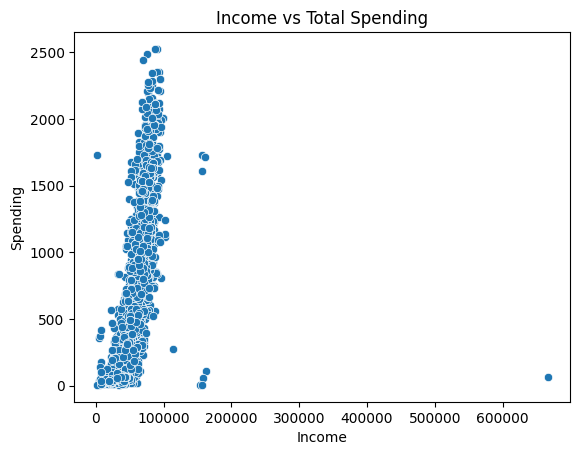

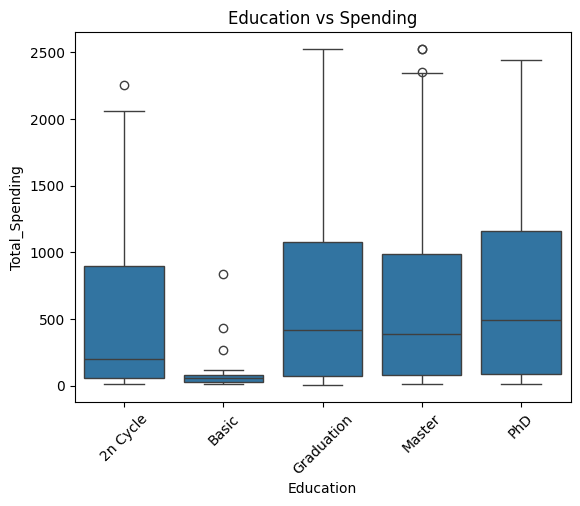

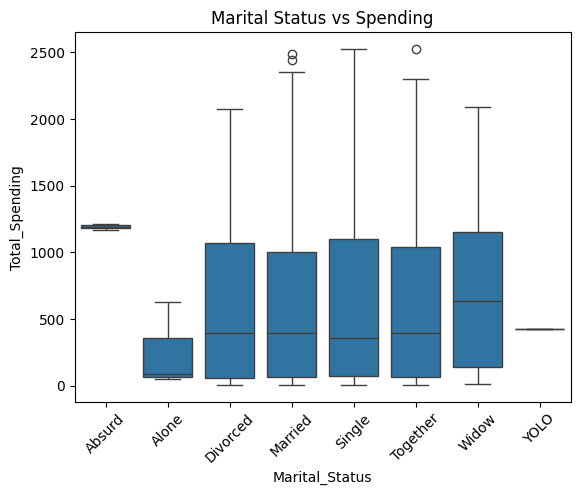

In [ ]:
# Step 1: Spending Behavior vs Demographics (Correlation)
# Add total spending column
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


# Plot: Income vs Spending
sns.scatterplot(x='Income', y='Total_Spending', data=df)
plt.title("Income vs Total Spending")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.show()


#Step 2: Spending by Education
sns.boxplot(x='Education', y='Total_Spending', data=df)
plt.title("Education vs Spending")
plt.xticks(rotation=45)
plt.show()



#Step 3: Spending by Marital Status
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)
plt.title("Marital Status vs Spending")
plt.xticks(rotation=45)
plt.show()





**Task 5:** Conclusion and Recommendations

# Recommendations

1.High-Income Customers Spend More:
Focus marketing campaigns on customers with income above average (>60,000).

2.Single & Married Customers Spend More on Luxury Items:
Target these groups with offers on wine, gold, and sweet products.

3.Graduates and PhD Customers Have Higher Average Spending:
Segment based on education and promote personalized product bundles.

4.Middle-aged Customers (30–50 yrs) Are the Highest Spenders:
Design campaigns around their lifestyle needs (e.g., meat, wine, gold).

5.Campaign Responses Are Higher for Mid-Spenders:
Aggressive promotions may not work on very high or low spenders — segment wisely.



# Conclusion

This analysis provided valuable insights into the spending behavior of customers across various demographic groups. By cleaning and preprocessing the dataset, applying descriptive statistics, and visualizing key patterns, we identified strong relationships between customer characteristics (such as income, education, marital status, and age) and their purchasing habits.

Key findings include:

* Customers with higher income tend to spend more across all product categories.

* Education level influences spending — especially Graduates and PhDs spend significantly more.

* Married and single customers showed higher spending than other marital groups.

* Customers aged 30–50 years are the most valuable segment, actively engaged and responsive to campaigns.

These insights can guide the company to:

* Design targeted campaigns based on income and education level.

* Segment customers effectively for personalized offers.

* Focus efforts on the middle-age demographic for maximum return.

* Avoid over-targeting very high or very low spenders, who show lower response rates to marketing.
